In [1]:
pip install bagpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lz4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bagpy import bagreader
b = bagreader("/home/anastasiaef/Downloads/scene.bag")

print(b.topic_table)

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


Python older than 3.7 detected. 
[INFO]  Data folder /home/anastasiaef/Downloads/scene already exists. Not creating.
                                                Topics  \
0    /DEBUG/StateTracker2Node/acceleration_processo...   
1    /DEBUG/StateTracker2Node/acceleration_processo...   
2       /DEBUG/StateTracker2Node/orientation_processor   
3                                   /DEBUG/area_border   
4                                     /DEBUG/cas_debug   
..                                                 ...   
211                      /srr/radar_detection_clusters   
212                        /srr/radar_detection_points   
213                                /srr/radar_polygons   
214                                                /tf   
215                                         /tf_static   

                                 Types  Message Count    Frequency  
0         geometry_msgs/Vector3Stamped           9654    59.365680  
1         geometry_msgs/Vector3Stamped          

In [47]:
import pandas as pd
data = pd.read_csv("/home/anastasiaef/Downloads/state.csv")
data.head(10)

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.info.header.seq,field.info.header.stamp,field.info.header.frame_id,field.info.vehid,field.info.type,field.info.msg_ver,...,field.direction,field.weight,field.correction.x,field.correction.y,field.correction.z,field.reason.reason,field.reason.point.x,field.reason.point.y,field.reason.point.z,field.reason.state
0,1687475309246809836,2209146,1687475309243326902,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1,1687475309262238808,2209147,1687475309259879112,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
2,1687475309276065193,2209148,1687475309272850990,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,1687475309294908716,2209149,1687475309292689085,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
4,1687475309309610537,2209150,1687475309306243896,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
5,1687475309325781347,2209151,1687475309322439908,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
6,1687475309349138403,2209152,1687475309343530893,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
7,1687475309359392370,2209153,1687475309356064081,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,1687475309379891500,2209154,1687475309376991033,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
9,1687475309396388932,2209155,1687475309392787933,NaN,0,0,NaN,1007002,NaN,NaN,...,1,0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN


In [5]:
data.keys()

Index(['%time', 'field.header.seq', 'field.header.stamp',
       'field.header.frame_id', 'field.info.header.seq',
       'field.info.header.stamp', 'field.info.header.frame_id',
       'field.info.vehid', 'field.info.type', 'field.info.msg_ver',
       'field.info.comm', 'field.speed', 'field.position.x',
       'field.position.y', 'field.position.z', 'field.yaw',
       'field.wheel_angle', 'field.quality', 'field.distance', 'field.status',
       'field.direction', 'field.weight', 'field.correction.x',
       'field.correction.y', 'field.correction.z', 'field.reason.reason',
       'field.reason.point.x', 'field.reason.point.y', 'field.reason.point.z',
       'field.reason.state'],
      dtype='object')

In [76]:
i=0
j=1
stops=0
while (j<len(data['field.position.x'])):
    if (data['field.speed'][i]!=0):
        if (data['field.position.x'][j]==data['field.position.x'][i]) or \
        (data['field.position.y'][j]==data['field.position.y'][i]) or \
        (data['field.position.z'][j]==data['field.position.z'][i]) or \
        (data['field.speed'][j]<data['field.speed'][i]):
            if (data['field.speed'][j]==0):
                stops+=1
    i+=1
    j+=1

In [77]:
print(stops)

0


In [61]:
speed=data['field.speed']
time=data['%time']

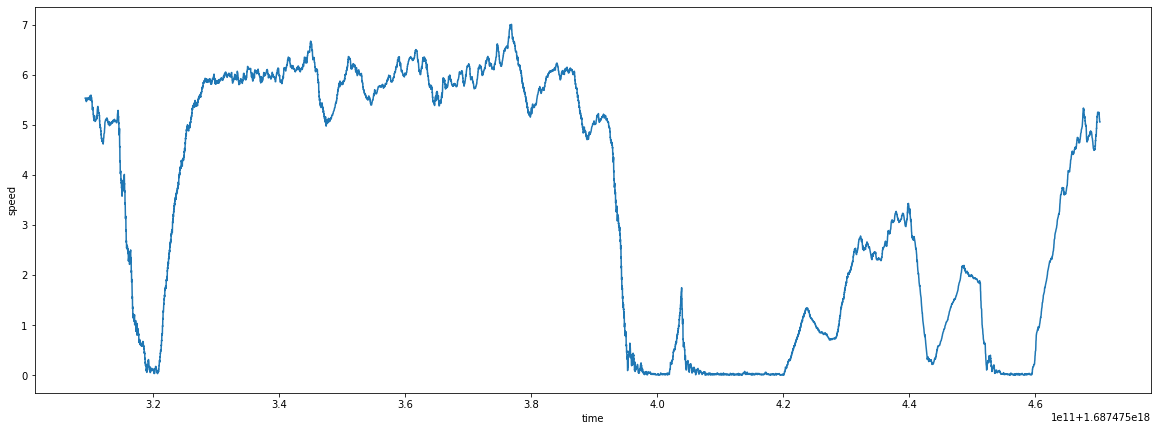

In [74]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(20, 7.1))
plt.plot(time,speed) 
plt.xlabel('time')
plt.ylabel('speed')
plt.show()

In [45]:
j=0
while (j<len(data['field.speed'])):
    if (data['field.speed'][j]==0):
        k+=1
    j+=1
print(k)

0
